# Propos préliminaire
L'objectif de ce script est d'utiliser le scraping réalisé par Nathann Cohen en complément de nos propres données. Nous téléchargons les données depuis son site, puis proposons quelques statistiques descriptives

# 1. Téléchargement de la base et mise en place

In [ ]:
import requests
import pandas as pd

## 1.1 Fetching the JSON data
# URL to Nathann Cohen's website. Filters : cabinet, JSON
json_url = "https://jorfsearch.steinertriples.ch/tag/cabinet?format=JSON"

# Fetch the JSON data from the URL
response = requests.get(json_url)
if response.status_code == 200:
    # Save the JSON data to a local file
    with open("nominations.json", "w", encoding="utf-8") as file:
        file.write(response.text)
    print("JSON data downloaded and saved to 'nominations.json'.")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


## 2. Converting it to a working panda
with open("nominations.json", "r", encoding="utf-8") as file:
    data = pd.read_json(file)

nominations = pd.DataFrame(data)
print(nominations.head())

JSON data downloaded and saved to 'nominations.json'.
                                       organisations source_date  \
0  [{'nom': 'Préfecture des Alpes-Maritimes', 'wi...  2024-12-06   
1                                                 []  2024-12-05   
2                                                 []  2024-12-05   
3                                                 []  2024-12-05   
4                                                 []  2024-12-05   

              source_id source_name             type_ordre a_sa_demande  \
0  JORFTEXT000050749415        JORF  cessation de fonction         true   
1  JORFTEXT000050734261        JORF             nomination          NaN   
2  JORFTEXT000050734261        JORF  cessation de fonction          NaN   
3  JORFTEXT000050734252        JORF             nomination          NaN   
4  JORFTEXT000050734252        JORF  cessation de fonction          NaN   

  sous-prefet                                            cabinet sexe  \
0        true

In [7]:
## 1.3 Filtres afin de ne conserver que les cabinets ministériels
print(nominations.columns)

# Unique values and their counts for 'type_ordre'
type_ordre_counts = nominations['type_ordre'].value_counts()
print("Unique values in 'type_ordre' and their counts:")
print(type_ordre_counts)

# Unique values and their counts for 'cabinet_ministeriel'
cabinet_ministeriel_counts = nominations['cabinet_ministeriel'].value_counts()
print("\nUnique values in 'cabinet_ministeriel' and their counts:")
print(cabinet_ministeriel_counts)


nominations_ministerielles = nominations[
    (nominations['cabinet_ministeriel'].isna() != True) &
    (nominations['type_ordre'] == 'nomination')
]

cessations = nominations[
    (nominations['cabinet_ministeriel'].isna() != True) &
    (nominations['type_ordre'] == 'cessation de fonction')
]

# 1.4 Premiers comptes
total_nominations_ministerielles = len(nominations_ministerielles)
total_cessations = len(cessations)

# Convert 'source_date' to datetime
nominations_ministerielles['source_date'] = pd.to_datetime(nominations_ministerielles['source_date'], errors='coerce')
cessations['source_date'] = pd.to_datetime(cessations['source_date'], errors='coerce')

# Counts per year
nominations_ministerielles_per_year = nominations_ministerielles['source_date'].dt.year.value_counts().sort_index()
cessations_per_year = cessations['source_date'].dt.year.value_counts().sort_index()

# Display results
print("Total Nominations Ministerielles:", total_nominations_ministerielles)
print("Total Cessations:", total_cessations)
print("Nominations Ministerielles Per Year:\n", nominations_ministerielles_per_year)
print("Cessations Per Year:\n", cessations_per_year)



Index(['organisations', 'source_date', 'source_id', 'source_name',
       'type_ordre', 'a_sa_demande', 'sous-prefet', 'cabinet', 'sexe', 'nom',
       'prenom', 'date_debut', 'cabinet_ministeriel', 'grade', 'date_fin',
       'autorite_delegation', 'ecole', 'parlement', 'duree', 'suppleant',
       'remplacement', 'prefet', 'secretaire_general_de_prefecture',
       'sous-prefet_sous-prefecture', 'sous-prefecture_departement_code',
       'visa_emploi_superieur', 'conseil_des_ministres', 'autres_prenoms',
       'conseil_administration', 'inspecteur_general', 'membre_gouvernement',
       'ministre', 'tribunal', 'depart_retraite',
       'conseiller_affaire_etrangeres', 'ambassadeur',
       'ambassadeur_thematique', 'cour_comptes', 'magistrat', 'nom_alternatif',
       'corps', 'tribunal_administratif', 'maitre_de_conference',
       'tribunal_grande_instance', 'secretaire_affaires_etrangeres'],
      dtype='object')
Unique values in 'type_ordre' and their counts:
type_ordre
nominati

/tmp/ipykernel_12139/3816085935.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominations_ministerielles['source_date'] = pd.to_datetime(nominations_ministerielles['source_date'], errors='coerce')
/tmp/ipykernel_12139/3816085935.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessations['source_date'] = pd.to_datetime(cessations['source_date'], errors='coerce')


Nous avons moins de cessation que de nominations : il n'est pas certain que ces données soient homogènes, donc nous allons rester sur les nominations. 

# 2. Statistiques descriptives
## 2.1 Evolutions du nombre de nominations

/tmp/ipykernel_12139/1021414675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominations_ministerielles['source_date'] = pd.to_datetime(nominations_ministerielles['source_date'], errors='coerce')
/tmp/ipykernel_12139/1021414675.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)  # Add the legend


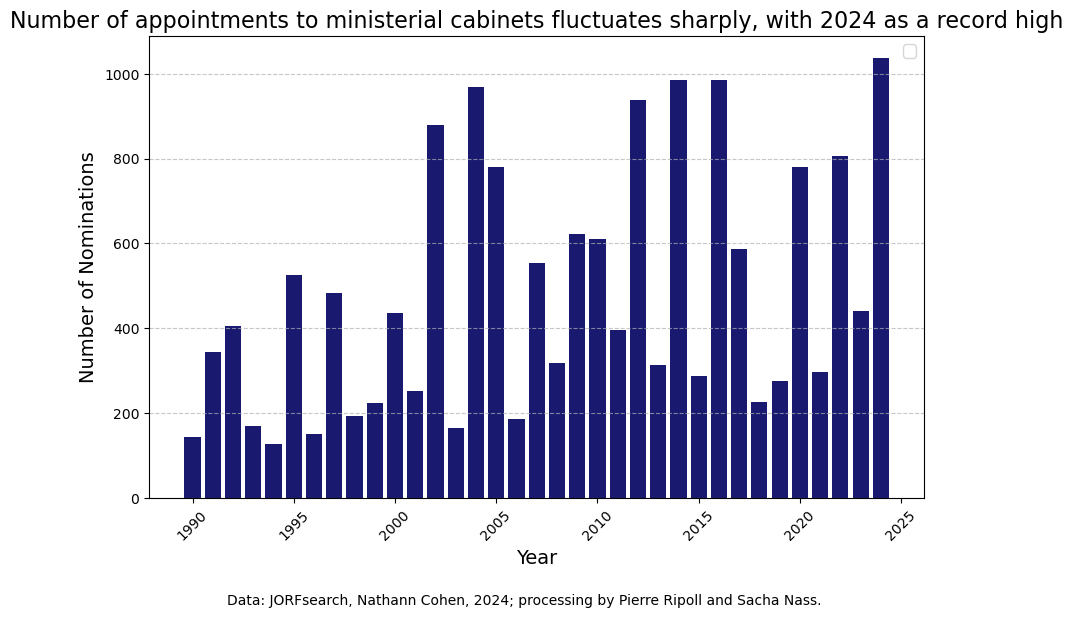

In [18]:
import matplotlib.pyplot as plt

# Ensure 'source_date' is in datetime format
nominations_ministerielles['source_date'] = pd.to_datetime(nominations_ministerielles['source_date'], errors='coerce')

# Count nominations per year
nominations_per_year = nominations_ministerielles['source_date'].dt.year.value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(nominations_per_year.index, nominations_per_year.values, color='MidnightBlue')
plt.title("Number of appointments to ministerial cabinets fluctuates sharply, with 2024 as a record high", fontsize=16)
plt.suptitle("Data: JORFsearch, Nathann Cohen, 2024; processing by Pierre Ripoll and Sacha Nass.", fontsize=10, y=-0.05) 
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Nominations', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)  # Add the legend
plt.show()


## 2.2. Une féminisation des cabinets ministériels ... 

/tmp/ipykernel_12139/3040116719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominations_ministerielles['year'] = nominations_ministerielles['source_date'].dt.year


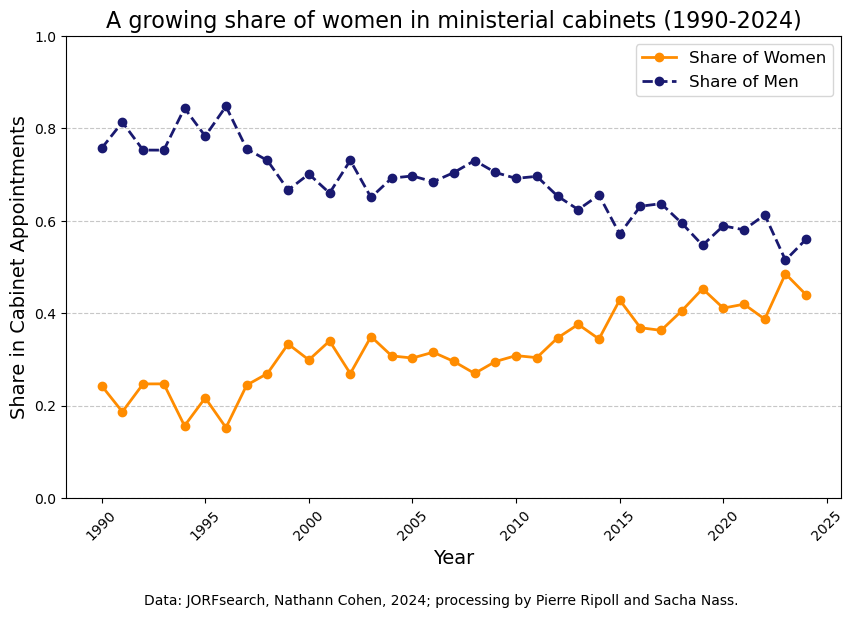

In [21]:
# Extract year and filter valid data
nominations_ministerielles['year'] = nominations_ministerielles['source_date'].dt.year
valid_nominations = nominations_ministerielles.dropna(subset=['year', 'sexe'])

# Calculate the share of 'F' and 'M' per year
shares_per_year = valid_nominations.groupby('year')['sexe'].value_counts(normalize=True).unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(shares_per_year.index, shares_per_year['F'], label="Share of Women", color='darkorange', marker='o', linestyle='-', linewidth=2)
plt.plot(shares_per_year.index, shares_per_year['M'], label="Share of Men", color='MidnightBlue', marker='o', linestyle='--', linewidth=2)

# Customize the plot
plt.title("A growing share of women in ministerial cabinets (1990-2024)", fontsize=16)
plt.suptitle("Data: JORFsearch, Nathann Cohen, 2024; processing by Pierre Ripoll and Sacha Nass.", fontsize=10, y=-0.05)  
plt.xlabel('Year', fontsize=14)
plt.ylabel('Share in Cabinet Appointments', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Shares are between 0 and 1
plt.show()


## 2.3. Qui cache un plafond de verre ?